# Predictive Analytics - Klasifikasi

## Importing Libraries

In [34]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Loading

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import opendatasets as od
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [36]:
od.download("https://www.kaggle.com/datasets/whenamancodes/blood-transfusion-dataset")

Skipping, found downloaded files in "./blood-transfusion-dataset" (use force=True to force download)


In [37]:
blood = pd.read_csv("/content/blood-transfusion-dataset/transfusion.csv")
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [38]:
print(len(blood))
blood.keys()

748


Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

Output kode di atas memberikan informasi sebagai berikut:

* Ada 748 baris (records atau jumlah pengamatan) dalam dataset.
* Terdapat 5 kolom yaitu: 'Recency', 'Frequency', 'Monetary', 'Time', 'Class'

## Data Exploration

### Deskripsi Variabel

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/whenamancodes/blood-transfusion-dataset), variabel-variabel pada Blood Transfusion Dataset adalah sebagai berikut:

- Recency: bulan sejak transfusi darah terakhir
- Frequency: banyak transfusi darah
- Monetary: total banyak darah yang didonorkan
- Time: bulan sejak transfusi darah pertama
- Class: apakah pendonor darah (1) pada maret 2007 atau tidak (0)

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi info() berikut.

In [39]:
blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


Dari output terlihat bahwa:
- Semua kolom merupakan tipe numerik karena tipe datanya int64

Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai untuk kolom numerik. Selanjutnya, Anda perlu mengecek deskripsi statistik data dengan fitur describe().

In [40]:
blood.rename(columns={'whether he/she donated blood in March 2007':'class'}, inplace=True)

In [41]:
blood.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

### Menangani Missing Value

Mari kita cek ada berapa missing value pada semua kolom.

In [42]:
blood.isnull().sum()

Recency (months)         0
Frequency (times)        0
Monetary (c.c. blood)    0
Time (months)            0
class                    0
dtype: int64

Dari output isnull().sum() terlihat bahwa setiap fitur tidak memiliki missing value.

### Univariate Analysis

Karena fitur pada dataset berupa fitur numerik semua, maka kita akan melihat histogram masing-masing fiturnya menggunakan code berikut.

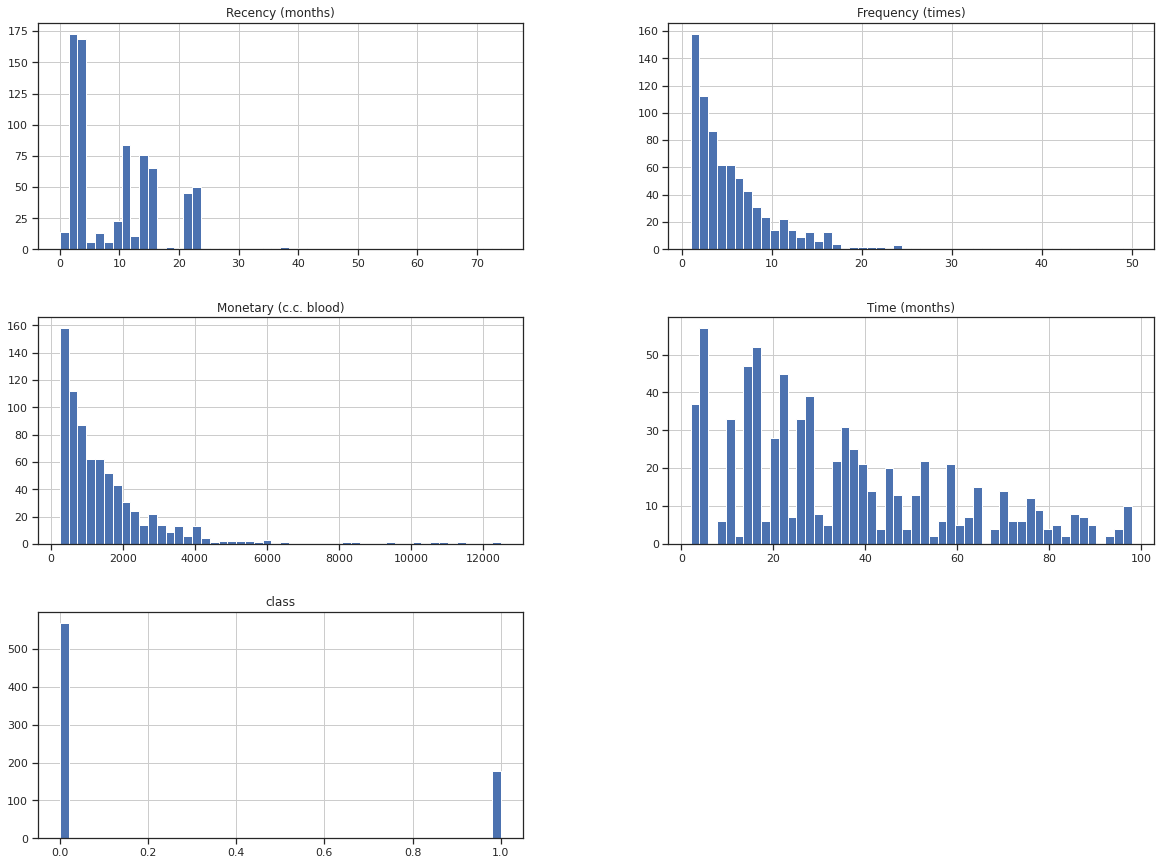

In [43]:
blood.hist(bins=50, figsize=(20,15))
plt.show()

Dari hasil output histogram di atas, diperoleh informasi antara lain:

- Pada histogram Frequency dan histogram Monetary miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

### Multivariate Analysis

Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). Tidak perlu menunggu lama, mari kita langsung analisis datanya.

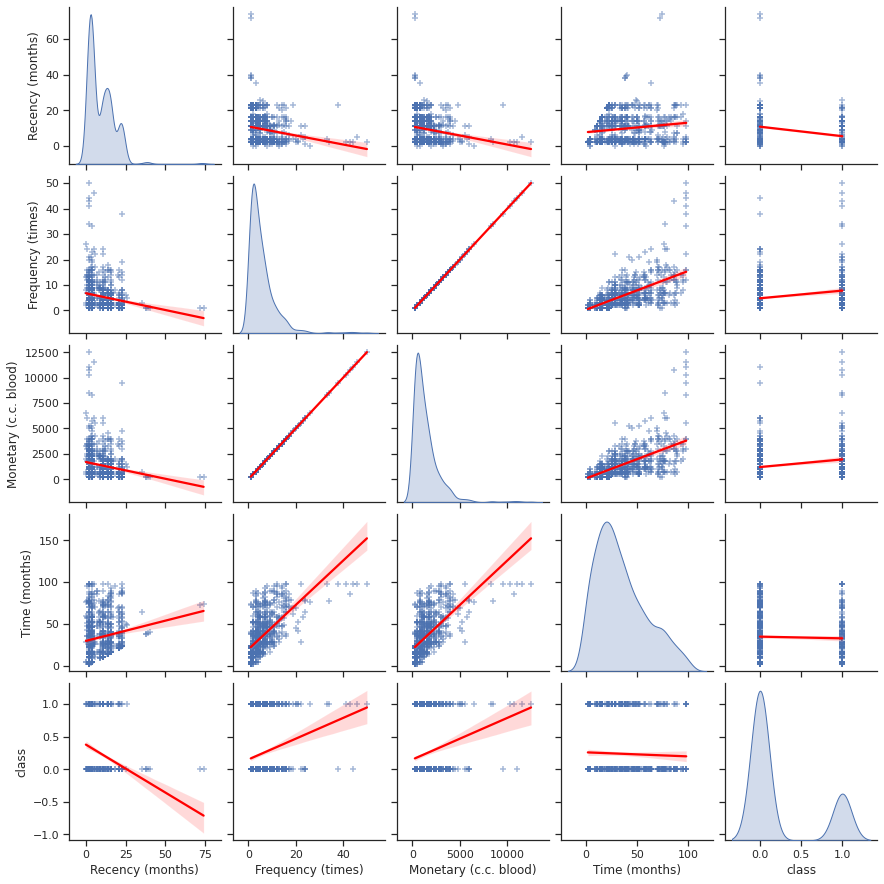

In [44]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.set(style="ticks", color_codes=True)
sns.pairplot(blood,
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Pada pola sebaran data grafik pairplot di atas, terlihat fitur Frequency memiliki korelasi kuat dengan fitur Monetary. Untuk mengevaluasi skor korelasinya, kita akan gunakan fungsi corr() sebagai berikut.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

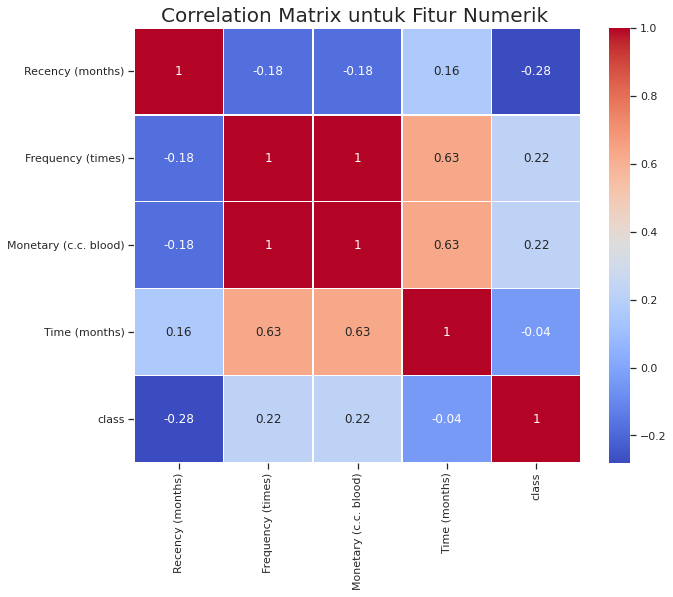

In [45]:
plt.figure(figsize=(10, 8))
correlation_matrix = blood.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Koefisien korelasi berkisar antara -1 dan +1. Semakin dekat nilainya ke 1 atau -1, maka korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0 maka korelasinya semakin lemah.

Dari grafik korelasi di atas, fitur Frequency memiliki korelasi kuat (1) dengan fitur target Monetary.

## Data Preparation

### Reduksi Dimensi dengan PCA

PCA umumnya digunakan ketika variabel dalam data yang memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant. Sebelumnya kita perlu cek kembali korelasi antar fitur (selain fitur target) dengan menggunakan pairplot.

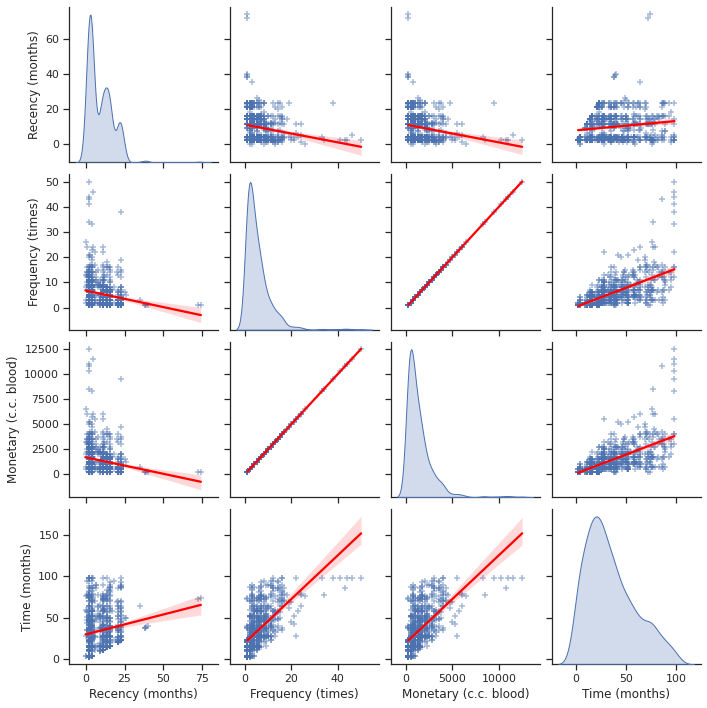

In [46]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(blood[[fitur for fitur in blood.keys() if fitur != "class"]],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

Selanjutnya kita akan mereduksi fitur Time, Frequency dan fitur Monetary karena ketiganya berkorelasi cukup kuat yang dapat dilihat pada visualisasi pairplot di atas.

In [47]:
from sklearn.decomposition import PCA

list_calon_fitur_pca = ['Time (months)', 'Frequency (times)', 'Monetary (c.c. blood)']
pca = PCA(n_components=len(list_calon_fitur_pca), random_state=123)
pca.fit(blood[list_calon_fitur_pca])
princ_comp = pca.transform(blood[list_calon_fitur_pca])

Setelah menerapkan class PCA dengan n_components sebanyak fitur yang dikenakan PCA, kita bisa mengetahui proporsi informasi dari ketiga komponen hasil PCA sebagai berikut:

In [48]:
pca.explained_variance_ratio_.round(3)

array([1., 0., 0.])

Arti dari output di atas adalah, 100% informasi pada ketiga fitur (Time, Frequency dan Monetary) terdapat pada PC (Principal Component) pertama. Sedangkan sisanya sebesar 0% terdapat pada PC kedua dan ketiga

Berdasarkan hasil tersebut, kita akan mereduksi fitur dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur yang menggantikan tiga fitur lainnya (Time, Frequency dan Monetary). Kita beri nama fitur ini PCA_TFM.


In [49]:
pca = PCA(n_components=1, random_state=123)
pca.fit(blood[list_calon_fitur_pca])
blood['PCA_TFM'] = pca.transform(blood[list_calon_fitur_pca]).flatten()
blood.drop(list_calon_fitur_pca, axis=1, inplace=True)
display(blood.sample(5))

,Recency (months),class,PCA_TFM
427,14,0,-128.249115
79,2,0,-878.955199
692,14,0,-1128.837108
362,4,0,-628.256816
259,12,0,1621.496844


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Train Test Split

Pada modul ini, kita akan menggunakan proporsi pembagian sebesar 80:20 dengan fungsi train_test_split dari sklearn. 

In [50]:
from sklearn.model_selection import train_test_split

blood.dropna(inplace=True)
X = blood.drop(["class"],axis =1)
y = blood["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 748
Total # of sample in train dataset: 598
Total # of sample in test dataset: 150


### Standarisasi

Proses standarisasi bertujuan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandarScaler menghasilkan distribusi deviasi sama dengan 1 dan mean sama dengan 0.

In [65]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = [fitur for fitur in blood.keys() if fitur != 'class']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_train[numerical_features].head()

,Recency (months),PCA_TFM
239,-0.232541,0.563993
269,0.363258,-0.278774
151,-0.709179,0.058355
245,-0.709179,-0.110095
59,-0.828339,0.058227


## Model Development

Pada tahap ini, kita akan menggunakan tiga algoritma untuk kasus klasifikasi ini. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menetukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1. K-Nearest Neighbor

    Kelebihan algoritma KNN adalah mudah dipahami dan digunakan sedangkan kekurangannya kika dihadapkan pada jumlah fitur atau dimensi yang besar rawan terjadi bias.

2. Random Forest
    
    Kelebihan algoritma Random Forest adalah menggunakan teknik Bagging yang berusaha melawan *overfitting* dengan berjalan secara paralel. Sedangkan kekurangannya ada pada kompleksitas algoritma Random Forest yang membutuhkan waktu relatif lebih lama dan daya komputasi yang lebih tinggi dibanding algoritma seperti Decision Tree.

3. Boosting Algorithm

    Kelebihan algoritma Boosting adalah menggunakan teknik Boosting yang berusaha menurunkan bias dengan berjalan secara sekuensial (memperbaiki model di tiap tahapnya). Sedangkan kekurangannya hampir sama dengan algoritma Random Forest dari segi kompleksitas komputasi yang menjadikan waktu pelatihan relatif lebih lama, selain itu noisy dan outliers sangat berpengaruh dalam algoritma ini.

Untuk langkah pertama, kita akan siapkan DataFrame baru untuk menampung nilai metrik Akurasi pada setiap model / algoritma. Hal ini berguna untuk melakukan analisa perbandingan antar model.

In [52]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train Accuracy', 'Test Accuracy'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### Model KNN

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih k tetangga terdekat. Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang *overfitting* dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k yang terlalu tinggi, maka model yang dihasilkan akan *underfitting* dan prediksinya memiliki bias yang tinggi [[1]](https://learning.oreilly.com/library/view/machine-learning-with/9781617296574/).

Oleh karena itu, kita akan mencoba beberapa nilai k yang berbeda (1 sampai 20) kemudian membandingan mana yang menghasilkan nilai metrik model (pada kasus ini kita pakai akurasi) terbaik. Selain itu, kita akan menggunakan metrik ukuran jarak secara default (Minkowski Distance) pada *library* sklearn.

In [53]:
list_mse = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_prediction = knn.predict(X_test)
  test_mse = accuracy_score(y_test, y_prediction)
  list_mse.append(test_mse)
  print(f"Nilai Accuracy untuk k = {k} adalah : {test_mse}")

Nilai Accuracy untuk k = 1 adalah : 0.64
Nilai Accuracy untuk k = 2 adalah : 0.6666666666666666
Nilai Accuracy untuk k = 3 adalah : 0.6533333333333333
Nilai Accuracy untuk k = 4 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 5 adalah : 0.7
Nilai Accuracy untuk k = 6 adalah : 0.76
Nilai Accuracy untuk k = 7 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 8 adalah : 0.74
Nilai Accuracy untuk k = 9 adalah : 0.7466666666666667
Nilai Accuracy untuk k = 10 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 11 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 12 adalah : 0.7266666666666667
Nilai Accuracy untuk k = 13 adalah : 0.7266666666666667
Nilai Accuracy untuk k = 14 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 15 adalah : 0.7266666666666667
Nilai Accuracy untuk k = 16 adalah : 0.72
Nilai Accuracy untuk k = 17 adalah : 0.72
Nilai Accuracy untuk k = 18 adalah : 0.7133333333333334
Nilai Accuracy untuk k = 19 adalah : 0.7333333333333333
Nilai Accuracy untuk k = 20 ad

Dan jika kita coba visualisasikan dengan fungsi plot() dalam DataFrame kita peroleh:

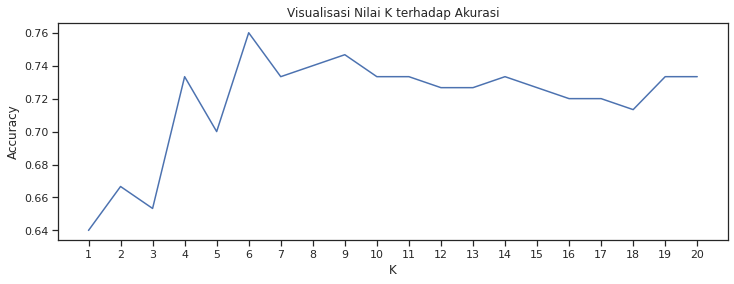

In [54]:
pd.DataFrame(list_mse, index=range(1, 21)).plot(
    xlabel="K",
    ylabel="Accuracy",
    legend=False,
    xticks=range(1,21), 
    figsize=(12,4),
    title='Visualisasi Nilai K terhadap Akurasi')

Dari hasil output diatas, nilai akurasi terbaik dicapai ketika k = 6 yaitu sebesar 0.76. Oleh karena itu kita akan menggunakan k = 6 dan menyimpan nilai akurasi nya (terhadap data latih, untuk data uji akan dilakukan pada proses evaluasi) kedalam df_models yang telah kita siapkan sebelumnya.

In [55]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train, y_train)
df_models.loc['Train Accuracy', 'KNN'] = accuracy_score(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

### Model Random Forest

Random forest merupakan algoritma *supervised learning* yang termasuk ke dalam kategori *ensemble* (group) learning. Pada model *ensemble*, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model *ensemble* ini digabungkan untuk membuat prediksi akhir. Jenis metode *ensemble* yang digunakan pada Random Forest adalah teknik Bagging. Metode ini bekerja dengan membuat subset dari data train yang independen. Beberapa model awal (base model / weak model) dibuat untuk dijalankan secara simultan / paralel dan independen satu sama lain dengan subset data train yang independen. Hasil prediksi setiap model kemudian dikombinasikan untuk menentukan hasil prediksi final. 

Parameter-parameter (*hyperparameter*) yang digunakan pada algoritma ini antara lain:

- n_estimator: jumlah trees (pohon) di forest.
- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.

Untuk menentukan nilai *hyperparameter* (n_estimator & max_depth), dilakukan tuning dengan GridSearchCV dan hasilnya sebagai berikut:

In [56]:
params_rf = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "max_depth": [4, 8, 16, 32]
}

# Grid search model
gs_model = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
    param_grid=params_rf,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='accuracy', # Accuracy
    verbose=3
)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ......max_depth=4, n_estimators=10;, score=0.808 total time=   1.2s
[CV 2/5] END ......max_depth=4, n_estimators=10;, score=0.767 total time=   0.0s
[CV 3/5] END ......max_depth=4, n_estimators=10;, score=0.758 total time=   0.1s
[CV 4/5] END ......max_depth=4, n_estimators=10;, score=0.773 total time=   0.0s
[CV 5/5] END ......max_depth=4, n_estimators=10;, score=0.790 total time=   0.0s
[CV 1/5] END ......max_depth=4, n_estimators=20;, score=0.792 total time=   0.1s
[CV 2/5] END ......max_depth=4, n_estimators=20;, score=0.783 total time=   0.1s
[CV 3/5] END ......max_depth=4, n_estimators=20;, score=0.775 total time=   0.1s
[CV 4/5] END ......max_depth=4, n_estimators=20;, score=0.782 total time=   0.1s
[CV 5/5] END ......max_depth=4, n_estimators=20;, score=0.773 total time=   0.1s
[CV 1/5] END ......max_depth=4, n_estimators=30;, score=0.808 total time=   0.1s
[CV 2/5] END ......max_depth=4, n_estimators=30

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=123),
             param_grid={'max_depth': [4, 8, 16, 32],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy', verbose=3)

Mengecek hasil tuning hyperparameter dan nilai metrik Akurasi.

In [57]:
print("Hasil tuning hyperparameter", gs_model.best_params_)

print("Nilai accuracy model GridSearchCV_RF dengan data latih", accuracy_score(
    y_pred=gs_model.predict(X_train),
    y_true=y_train))
print("Nilai accuracy model GridSearchCV_RF dengan data uji", accuracy_score(
    y_pred=gs_model.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'max_depth': 4, 'n_estimators': 40}
Nilai accuracy model GridSearchCV_RF dengan data latih 0.7976588628762542
Nilai accuracy model GridSearchCV_RF dengan data uji 0.7466666666666667


Dari hasil output di atas diperoleh nilai Akurasi terbaik dalam jangkauan parameter params_rf yaitu 0.79766 (dengan data train) dan 0.74667 (dengan data test) dengan n_estimators: 40 dan max_depth: 4. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai Akurasi nya kedalam df_models yang telah kita siapkan sebelumnya.

In [58]:
RF = RandomForestClassifier(n_estimators=40, max_depth=4)
RF.fit(X_train, y_train)

df_models.loc['Train Accuracy', 'RandomForest'] = accuracy_score(
    y_pred=RF.predict(X_train),
    y_true=y_train)

### Model Boosting Algorithm

Jika sebelumnya kita menggunakan algoritma *bagging* (Random Forest). Selanjutnya kita akan menggunakan metode lain dalam model *ensemble* yaitu teknik *Boosting*. Algoritma *Boosting* bekerja dengan membangun model dari data train. Kemudian membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. Teknik ini bekerja secara sekuensial.

Pada kasus ini kita akan menggunakan metode *Adaptive Boosting*. Untuk implementasinya kita menggunakan AdaBoostClassifier dari library sklearn dengan base_estimator defaultnya yaitu DecisionTreeClassifier hampir sama dengan RandomForestClassifier bedanya menggunakan metode teknik *Boosting*.

Parameter-parameter (hyperparameter) yang digunakan pada algoritma ini antara lain:

- n_estimator: jumlah *estimator* dan ketika mencapai nilai jumlah tersebut algoritma Boosting akan dihentikan.
- learning_rate: bobot yang diterapkan pada setiap *classifier* di masing-masing iterasi Boosting.
- random_state: digunakan untuk mengontrol *random number* generator yang digunakan.

Untuk menentukan nilai *hyperparameter* (n_estimator & learning_rate) di atas, kita akan melakukan *tuning* dengan GridSearchCV.

In [59]:
params_ab = {
    "n_estimators": np.arange(10, 100, 10), # kelipatan 10 mulai dari 10 sampai 90
    "learning_rate": [0.001, 0.01, 0.1, 0.2]
}

# Grid search model
gs_model_ab = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=123),
    param_grid=params_ab,
    # Ref: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring='accuracy', # Negatif dari nilai MSE
    verbose=3
)

gs_model_ab.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.001, n_estimators=10;, score=0.767 total time=   0.0s
[CV 2/5] END learning_rate=0.001, n_estimators=10;, score=0.767 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=10;, score=0.767 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=10;, score=0.773 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=10;, score=0.773 total time=   0.0s
[CV 1/5] END learning_rate=0.001, n_estimators=20;, score=0.767 total time=   0.0s
[CV 2/5] END learning_rate=0.001, n_estimators=20;, score=0.767 total time=   0.0s
[CV 3/5] END learning_rate=0.001, n_estimators=20;, score=0.767 total time=   0.0s
[CV 4/5] END learning_rate=0.001, n_estimators=20;, score=0.773 total time=   0.0s
[CV 5/5] END learning_rate=0.001, n_estimators=20;, score=0.773 total time=   0.1s
[CV 1/5] END learning_rate=0.001, n_estimators=30;, score=0.767 total time=   0.1s
[CV 2/5] END learning_rat

GridSearchCV(estimator=AdaBoostClassifier(random_state=123),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             scoring='accuracy', verbose=3)

Mengecek hasil tuning hyperparameter dan nilai metrik Akurasi.

In [60]:
print("Hasil tuning hyperparameter", gs_model_ab.best_params_)

# AB = AdaBoosting
print("Nilai Akurasi model GridCV_AB dengan data latih", accuracy_score(
    y_pred=gs_model_ab.predict(X_train),
    y_true=y_train))
print("Nilai Akurasi model GridSearchCV_AB dengan data uji", accuracy_score(
    y_pred=gs_model_ab.predict(X_test),
    y_true=y_test))

Hasil tuning hyperparameter {'learning_rate': 0.2, 'n_estimators': 30}
Nilai Akurasi model GridCV_AB dengan data latih 0.7809364548494984
Nilai Akurasi model GridSearchCV_AB dengan data uji 0.7466666666666667


Dari hasil output di atas diperoleh nilai Akurasi terbaik dalam jangkauan parameter params_ab yaitu 0.78094 (dengan data train) dan 0.74667 (dengan data test) dengan n_estimators: 30 dan learning_rate: 0.2. Selanjutnya kita akan menggunakan pengaturan parameter tersebut dan menyimpan nilai Akurasi nya kedalam df_models yang telah kita siapkan sebelumnya.

In [61]:
boosting = AdaBoostClassifier(n_estimators=30, learning_rate=0.2)
boosting.fit(X_train, y_train)

df_models.loc['Train Accuracy', 'Boosting'] = accuracy_score(
    y_pred=boosting.predict(X_train),
    y_true=y_train)

## Evaluasi Model

Dari proses sebelumnya, kita telah membuat tiga model yang berbeda dan juga telah melatihnya. Selanjutnya kita perlu mengevaluasi model-model tersebut menggunakan data uji dan metrik yang digunakan dalam kasus ini yaitu akurasi. Hasil evaluasi kemudian kita simpan ke dalam df_models.

In [62]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test Accuracy', name] = accuracy_score(
      y_pred=model.predict(X_test),
      y_true=y_test)
  
# Mengecek evaluasi model
display(df_models)

,KNN,RandomForest,Boosting
Train Accuracy,0.809365,0.785953,0.780936
Test Accuracy,0.76,0.74,0.746667


Untuk memudahkan, mari kita *plot* hasil evaluasi model dengan *bar chart*.

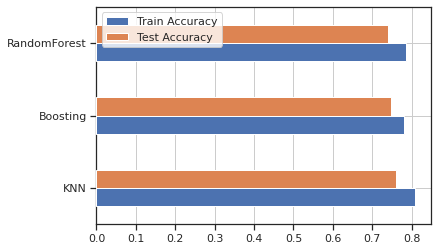

In [63]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test Accuracy', ascending=False).plot(kind='barh', ax=ax, zorder=3)
plt.legend(loc="upper left")
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model KNN memberikan nilai Akurasi (pada data uji) yang paling tinggi. Sebelum memutuskan model terbaik untuk melakukan prediksi "Class" (pendonor atau bukan pendonor darah). Mari kita coba uji prediksi menggunakan beberapa sampel acak (10) pada data uji.

In [66]:
dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

X_sample = X_test.sample(10)
dict_result['index_sample'] = X_sample.index.values
dict_result['y_true'] = [pd.DataFrame(y_test).loc[idx, 'class'] for idx in dict_result['index_sample']]

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
  dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
index_sample,,,,
414,0,0,0,0
370,1,0,0,0
263,1,0,0,0
379,0,0,0,0
294,0,0,0,0
170,0,0,0,0
511,0,0,0,0
696,0,0,0,0
529,1,1,0,0


## Kesimpulan

Berdasarkan hasil evaluasi model di atas, dapat disimpulkan bahwa model terbaik untuk melakukan klasifikasi "Class" (pendonor atau bukan pendonor darah) adalah model KNN. Hal ini dilihat dari nilai akurasi pada data uji yang menunjukan bahwa model KNN mempunyai akurasi tertinggi sebesar 0.8093 disusul dengan RandomForest (0.7876).

## Daftar Referensi

[1] Rhys, Hefin. "Machine Learning with R, the Tidyverse, and MLR". Manning Publications. 2020. Tersedia: [O'Reilly Media](https://learning.oreilly.com/library/view/machine-learning-with/9781617296574/).

## Data Diri

- Muhamad Dani
- M267Y0595
- M06